In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics


In [2]:
#import data
city_data_df=pd.read_csv("Resources/city_data.csv")
city_data_df

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
...,...,...,...
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural


In [3]:
#import rider data
ride_data_df=pd.read_csv("Resources/ride_data.csv")
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.740000e+12
1,South Michelleport,3/4/2019 18:24,30.24,2.340000e+12
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.010000e+12
3,Rodneyfort,2/10/2019 23:22,23.44,5.150000e+12
4,South Jack,3/6/2019 4:28,34.58,3.910000e+12
5,South Latoya,3/11/2019 12:26,9.52,2.000000e+12
6,New Paulville,2/27/2019 11:17,43.25,7.930000e+11
7,Simpsonburgh,4/26/2019 0:43,35.98,1.120000e+11
8,South Karenland,1/8/2019 3:28,35.09,8.000000e+12
9,North Jasmine,3/9/2019 6:26,42.81,5.330000e+12


In [4]:
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [5]:
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [8]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id    float64
dtype: object

In [9]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [10]:
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [11]:
sum(city_data_df["type"]=="Urban")

66

In [12]:
sum(city_data_df["type"]=="Suburban")

36

In [13]:
sum(city_data_df["type"]=="Rural")

18

In [14]:
#merging data
pyber_data_df=pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
pyber_data_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.740000e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.340000e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.010000e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.150000e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.910000e+12,46,Urban
5,South Latoya,3/11/2019 12:26,9.52,2.000000e+12,10,Urban
6,New Paulville,2/27/2019 11:17,43.25,7.930000e+11,44,Urban
7,Simpsonburgh,4/26/2019 0:43,35.98,1.120000e+11,21,Urban
8,South Karenland,1/8/2019 3:28,35.09,8.000000e+12,4,Urban
9,North Jasmine,3/9/2019 6:26,42.81,5.330000e+12,33,Urban


In [15]:
avg_fare=pyber_data_df["fare"].mean()
avg_fare

26.753111578947426

In [22]:
pyber_data_df.rename(columns={"type":"city_type"},inplace=True)
print(pyber_data_df.columns)

Index(['city', 'date', 'fare', 'ride_id', 'driver_count', 'city_type'], dtype='object')


In [17]:
avg_fare_bygroup=pyber_data_df.groupby(["city_type"]).mean()["fare"]
avg_fare_bygroup

city_type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [26]:
x_axis=city_data_df["type"].unique()
x_axis

array(['Urban', 'Suburban', 'Rural'], dtype=object)

<IPython.core.display.Javascript object>


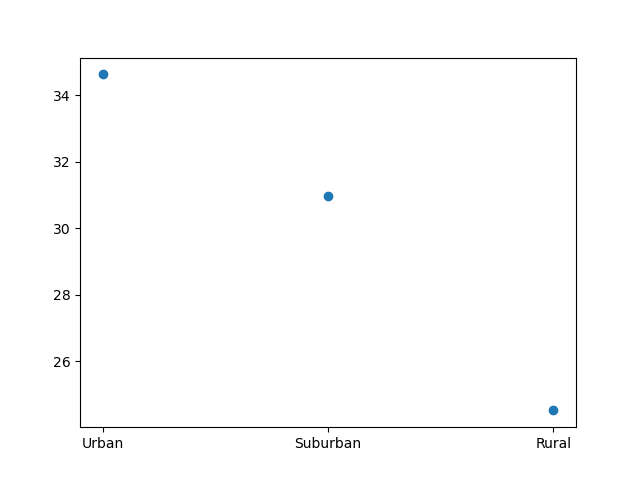

In [29]:
fig, ax = plt.subplots()
ax.scatter(x_axis,avg_fare_bygroup)